In [1]:
import uproot

In [172]:
def natural_sort(list, key=lambda s:s):
    """
    Sort the list into natural alphanumeric order.
    http://stackoverflow.com/questions/4836710/does-python-have-a-built-in-function-for-string-natural-sort
    """

    import re

    def get_alphanum_key_func(key):
        convert = lambda text: int(text) if text.isdigit() else text
        return lambda s: [convert(c) for c in re.split('([0-9]+)', key(s))]

    sort_key = get_alphanum_key_func(key)

    lc = sorted(list, key=sort_key)

    return lc

combineCards.py naive_stat_unc_2HDMa_sinp_0.35_tanb_1.0_mXd_10_MH3_1900_MH4_250_MH2_1900_MHC_1900_8.txt -S > naive_shapes.txt

combine -M FitDiagnostics naive_shapes.txt --robustHesse 1 --forceRecreateNLL --saveShapes --saveNormalizations --saveOverall --saveWithUncertainties

In [156]:
#f_in = "/home/users/dspitzba/WH/CMSSW_10_2_9/src/WH_studies/Plots/python/data/fitDiagnostics_800_100_ARC_update.root"
f_in = "/home/users/dspitzba/TOP/CMSSW_10_2_13/src/fitDiagnostics.root"

In [157]:
f = uproot.open(f_in)

In [40]:
test = f['shapes_fit_b']

In [41]:
test2 = test['nj2_highmet_res']

In [43]:
test2.keys()

['data;1',
 'sig;1',
 'top;1',
 'wjets;1',
 'total;1',
 'total_signal;1',
 'total_background;1',
 'total_covar;1']

In [17]:
f['shapes_fit_b'].keys()

['nj2_highmet_res;1',
 'nj2_highmet_res/data;1',
 'nj2_highmet_res/sig;1',
 'nj2_highmet_res/top;1',
 'nj2_highmet_res/wjets;1',
 'nj2_highmet_res/total;1',
 'nj2_highmet_res/total_signal;1',
 'nj2_highmet_res/total_background;1',
 'nj2_highmet_res/total_covar;1',
 'nj2_lowmet_boos;1',
 'nj2_lowmet_boos/data;1',
 'nj2_lowmet_boos/other;1',
 'nj2_lowmet_boos/sig;1',
 'nj2_lowmet_boos/top;1',
 'nj2_lowmet_boos/wjets;1',
 'nj2_lowmet_boos/total;1',
 'nj2_lowmet_boos/total_signal;1',
 'nj2_lowmet_boos/total_background;1',
 'nj2_lowmet_boos/total_covar;1',
 'nj2_lowmet_res;1',
 'nj2_lowmet_res/data;1',
 'nj2_lowmet_res/other;1',
 'nj2_lowmet_res/sig;1',
 'nj2_lowmet_res/top;1',
 'nj2_lowmet_res/wjets;1',
 'nj2_lowmet_res/total;1',
 'nj2_lowmet_res/total_signal;1',
 'nj2_lowmet_res/total_background;1',
 'nj2_lowmet_res/total_covar;1',
 'nj2_medmet_boos;1',
 'nj2_medmet_boos/data;1',
 'nj2_medmet_boos/other;1',
 'nj2_medmet_boos/sig;1',
 'nj2_medmet_boos/top;1',
 'nj2_medmet_boos/wjets;1',
 '

In [20]:
h = f['shapes_fit_b']['nj3_vhighmet_res']['wjets']

In [23]:
h.counts()

array([0.24755257], dtype=float32)

In [35]:
f['shapes_fit_b/nj3_medmet_res/top'].counts()[0] + f['shapes_fit_b/nj3_medmet_res/other'].counts()[0] + f['shapes_fit_b/nj3_medmet_res/wjets'].counts()[0]

7.3782306

In [36]:
f['shapes_fit_b']['nj3_medmet_res/total_background'].counts()

array([7.3782306], dtype=float32)

In [29]:
f['shapes_fit_b']['nj3_vhighmet_res/total_background'].errors()

array([0.20108971])

In [30]:
f['shapes_prefit']['nj3_vhighmet_res/total_background'].errors()

array([0.39683424])

In [25]:
f['shapes_fit_b']['total_background']

<TH1D (version 2) at 0x7fd2452b41f0>

In [37]:
bin_names = [
    'nj2_highmet_res',
    'nj2_lowmet_boos',
]

In [158]:
in_file = uproot.open(f_in)
shapes = ['shapes_fit_b', 'shapes_fit_s', 'shapes_prefit']
bins = [ x.split('/')[0].replace(';1','') for x in in_file[shapes[0]] ]

In [55]:
list(set(bins))

['total_overall',
 'nj3_lowmet_res',
 'nj2_highmet_res',
 'nj3_lowmet_boos',
 'nj3_medmet_boos',
 'overall_total_covar',
 'nj3_vhighmet_res',
 'nj2_lowmet_boos',
 'total_background',
 'nj2_medmet_boos',
 'nj2_medmet_res',
 'nj3_highmet_res',
 'total_signal',
 'nj2_lowmet_res',
 'total_data',
 'nj2_vhighmet_res',
 'nj3_medmet_res']

In [166]:
import numpy as np
def read_fitdiagnostics(in_file):
    shapes = ['shapes_fit_b', 'shapes_fit_s', 'shapes_prefit']
    bins = list(set([ x.split('/')[0].replace(';1','') for x in in_file[shapes[0]] ]))
    #print (bins)
    bins.remove('total_overall')
    bins.remove('overall_total_covar')
    bins.remove('total_data')
    bins.remove('total_background')
    bins.remove('total_signal')
    res = {}
    for shape in shapes:
        res[shape] = {}
        for bin in bins:
            #print (bin)
            res[shape][bin] = {}
            processes = [ x.replace(';1','') for x in in_file[shape][bin].keys() ]
            for process in processes:
                res[shape][bin][process] = {}
                if process == 'data':
                    res[shape][bin][process]['counts'] = in_file[shape][bin][process].values()[1]
                    res[shape][bin][process]['errors'] = np.sqrt(in_file[shape][bin][process].values()[1])
                else:
                    res[shape][bin][process]['counts'] = in_file[shape][bin][process].counts()
                    res[shape][bin][process]['errors'] = in_file[shape][bin][process].errors()

    return res

In [167]:
res = read_fitdiagnostics(in_file)

['ch1_bin28', 'ch1_bin30', 'ch1_bin1', 'ch1_bin5', 'ch1_bin39', 'ch1_bin10', 'ch1_bin9', 'ch1_bin4', 'ch1_bin27', 'ch1_bin38', 'ch1_bin13', 'ch1_bin20', 'ch1_bin7', 'overall_total_covar', 'ch1_bin12', 'ch1_bin8', 'ch1_bin22', 'ch1_bin29', 'ch1_bin37', 'ch1_bin19', 'total_overall', 'ch1_bin16', 'ch1_bin3', 'ch1_bin21', 'ch1_bin14', 'total_background', 'ch1_bin15', 'ch1_bin6', 'ch1_bin2', 'ch1_bin31', 'ch1_bin32', 'ch1_bin25', 'ch1_bin36', 'ch1_bin34', 'ch1_bin35', 'ch1_bin11', 'ch1_bin18', 'ch1_bin23', 'ch1_bin0', 'ch1_bin17', 'total_signal', 'total_data', 'ch1_bin24', 'ch1_bin33', 'ch1_bin26']


In [174]:
bins = natural_sort(list(res['shapes_prefit'].keys()))

In [109]:
import pandas as pd

In [175]:
pd.DataFrame(res['shapes_fit_b'])

,ch1_bin28,ch1_bin30,ch1_bin1,ch1_bin5,ch1_bin39,ch1_bin10,ch1_bin9,ch1_bin4,ch1_bin27,ch1_bin38,...,ch1_bin34,ch1_bin35,ch1_bin11,ch1_bin18,ch1_bin23,ch1_bin0,ch1_bin17,ch1_bin24,ch1_bin33,ch1_bin26
data,"{'counts': [5.004000186920166], 'errors': [2.2...","{'counts': [4817.4931640625], 'errors': [69.40...","{'counts': [4884.880859375], 'errors': [69.891...","{'counts': [83.18499755859375], 'errors': [9.1...","{'counts': [27.924999237060547], 'errors': [5....","{'counts': [17655.970703125], 'errors': [132.8...","{'counts': [10.881999969482422], 'errors': [3....","{'counts': [205.40899658203125], 'errors': [14...","{'counts': [7.24399995803833], 'errors': [2.69...","{'counts': [18.006999969482422], 'errors': [4....",...,"{'counts': [295.25299072265625], 'errors': [17...","{'counts': [111.6259994506836], 'errors': [10....","{'counts': [3742.34912109375], 'errors': [61.1...","{'counts': [6.769999980926514], 'errors': [2.6...","{'counts': [310.4110107421875], 'errors': [17....","{'counts': [19420.107421875], 'errors': [139.3...","{'counts': [11.626999855041504], 'errors': [3....","{'counts': [124.13899993896484], 'errors': [11...","{'counts': [561.2769775390625], 'errors': [23....","{'counts': [22.0939998626709], 'errors': [4.70..."
QCD,"{'counts': [0.20599994], 'errors': [0.76297630...","{'counts': [1377.3107], 'errors': [91.83272496...","{'counts': [933.05676], 'errors': [56.71883230...","{'counts': [4.5289993], 'errors': [1.855479029...","{'counts': [1.2369994], 'errors': [1.054094559...","{'counts': [5945.4683], 'errors': [284.3144298...","{'counts': [0.3899998], 'errors': [0.585492832...","{'counts': [14.034973], 'errors': [3.529097449...","{'counts': [0.23799989], 'errors': [0.79592331...","{'counts': [1.3739997], 'errors': [1.079571818...",...,"{'counts': [47.50093], 'errors': [6.5969294023...","{'counts': [15.116997], 'errors': [3.711214956...","{'counts': [1075.2686], 'errors': [73.24921927...","{'counts': [0.28900608], 'errors': [0.44543673...","{'counts': [11.874981], 'errors': [6.541735751...","{'counts': [6796.022], 'errors': [356.73554630...","{'counts': [0.60499984], 'errors': [0.98313797...","{'counts': [22.240995], 'errors': [4.505381032...","{'counts': [47.827957], 'errors': [7.304577037...","{'counts': [0.30900222], 'errors': [0.60801355..."
Wjets,"{'counts': [0.01], 'errors': [0.501339301242884]}","{'counts': [29.71095], 'errors': [7.7969360593...","{'counts': [657.2982], 'errors': [65.068094139...","{'counts': [0.009999997], 'errors': [2.4491479...","{'counts': [0.01], 'errors': [1.33669026900181...","{'counts': [1309.1515], 'errors': [138.2197209...","{'counts': [0.01], 'errors': [0.64394012902637...","{'counts': [11.772962], 'errors': [3.664084321...","{'counts': [0.01], 'errors': [1.447090017601866]}","{'counts': [0.01], 'errors': [0.11866355560453...",...,"{'counts': [6.2949824], 'errors': [2.649644475...","{'counts': [4.72099], 'errors': [2.10193791663...","{'counts': [317.68854], 'errors': [41.81019986...","{'counts': [0.010000039], 'errors': [0.9771439...","{'counts': [9.981973], 'errors': [3.4488440304...","{'counts': [2434.6965], 'errors': [267.4046091...","{'counts': [0.01], 'errors': [0.94000519771356...","{'counts': [6.2829747], 'errors': [3.584302629...","{'counts': [4.7209897], 'errors': [2.069507361...","{'counts': [0.010000012], 'errors': [0.8776792..."
Zjets,"{'counts': [3.7209957], 'errors': [1.361852929...","{'counts': [435.6106], 'errors': [40.461001671...","{'counts': [2768.9802], 'errors': [74.68523532...","{'counts': [67.912926], 'errors': [6.531230935...","{'counts': [18.465977], 'errors': [3.248527498...","{'counts': [5130.2173], 'errors': [201.4435094...","{'counts': [10.461987], 'errors': [2.405353932...","{'counts': [163.16663], 'errors': [10.51775238...","{'counts': [6.3509927], 'errors': [1.944473965...","{'counts': [16.602972], 'errors': [3.155699983...",...,"{'counts': [159.21768], 'errors': [11.99740084...","{'counts': [77.128914], 'errors': [7.001800479...","{'counts': [1473.0

In [176]:
def get_hist(
    res,
    bin_order,
    processes,
):
    values = {proc:np.array([]) for proc in processes}
    errors = {proc:np.array([]) for proc in processes}
    
    for bin in bin_order:
        for proc in processes:
            values[proc] = np.concatenate((
                values[proc],
                res[bin][proc]['counts'],
            ),
            axis=0,
            )
            errors[proc] = np.concatenate((
                errors[proc],
                res[bin][proc]['errors'],
            ),
            axis=0,
            )
    return values, errors
    
    

In [178]:

hists[0]['tt']

array([2.25995190e+03, 4.75886993e+02, 1.54718002e+02, 4.86739998e+01,
       1.18030005e+01, 8.98600006e+00, 5.94600010e+00, 5.20000011e-02,
       9.99999978e-03, 9.99999978e-03, 5.18705811e+03, 8.49034973e+02,
       1.60259995e+02, 3.61310005e+01, 9.51799965e+00, 5.80800009e+00,
       1.93599999e+00, 9.99999978e-03, 1.56700003e+00, 9.99999978e-03,
       8.07933008e+03, 1.71371301e+03, 3.31662994e+02, 1.06582001e+02,
       2.37290001e+01, 3.87199998e+00, 1.05670004e+01, 9.99999978e-03,
       9.99999978e-03, 9.99999978e-03, 2.96378003e+03, 2.74687402e+03,
       7.82025024e+02, 2.48809006e+02, 8.00240021e+01, 1.40699997e+01,
       2.97300005e+00, 2.05299997e+00, 9.99999978e-03, 8.04899979e+00])

In [179]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

from yahist import Hist1D, Hist2D

In [205]:
def add_uncertainty(values, errors, edges, ax, ratio=False):
    opts = {'step': 'post', 'label': 'Uncertainty', 'hatch': '///',
                    'facecolor': 'none', 'edgecolor': (0, 0, 0, .5), 'linewidth': 0, 'zorder':10.}
    
    if ratio:
        down = np.ones(len(values)) - errors/values
        up = np.ones(len(values)) + errors/values
    else:
        down = values - errors
        up = values + errors
    ax.fill_between(x=edges, y1=np.r_[down, down[-1]], y2=np.r_[up, up[-1]], **opts)

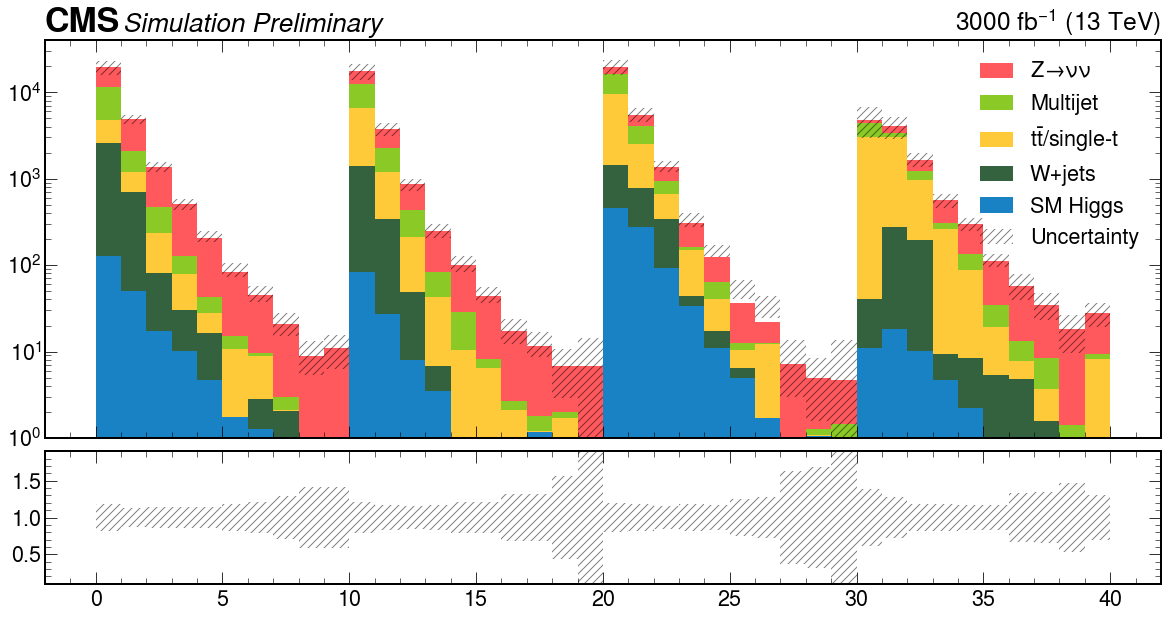

In [212]:
edges = np.linspace(0,40,41)

hists = get_hist(
    res["shapes_prefit"],
    bins,
    ['tt', 'Zjets', 'Wjets', 'other', 'QCD', 'total'],
)

hist_list = [
    hists[0]['other'],
    hists[0]['Wjets'],
    hists[0]['tt'],
    hists[0]['QCD'],
    hists[0]['Zjets'],
]

labels = [
    'SM Higgs',
    'W+jets',
    r'$t\bar{t}$/single-t',
    'Multijet',
    r'Z$\to\nu\nu$'
]

fig, (ax, rax) = plt.subplots(2,1,figsize=(20,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)


hep.cms.label(
    "Preliminary",
    data=False,
    lumi=3000,
    #com=14,
    loc=0,
    ax=ax,
)

hep.histplot(
    hist_list,
    edges,
    histtype="fill",
    stack=True,
    label=labels,
    color=['#1982c4', '#34623f',  '#ffca3a', '#8ac926', '#ff595e' ],
    ax=ax)

add_uncertainty(hists[0]['total'], hists[1]['total'], edges, ax)
add_uncertainty(hists[0]['total'], hists[1]['total'], edges, rax, ratio=True)


ax.legend()
ax.set_ylim(1,4e4)
rax.set_ylim(0.1,1.9)
ax.set_yscale('log')

plt.show()

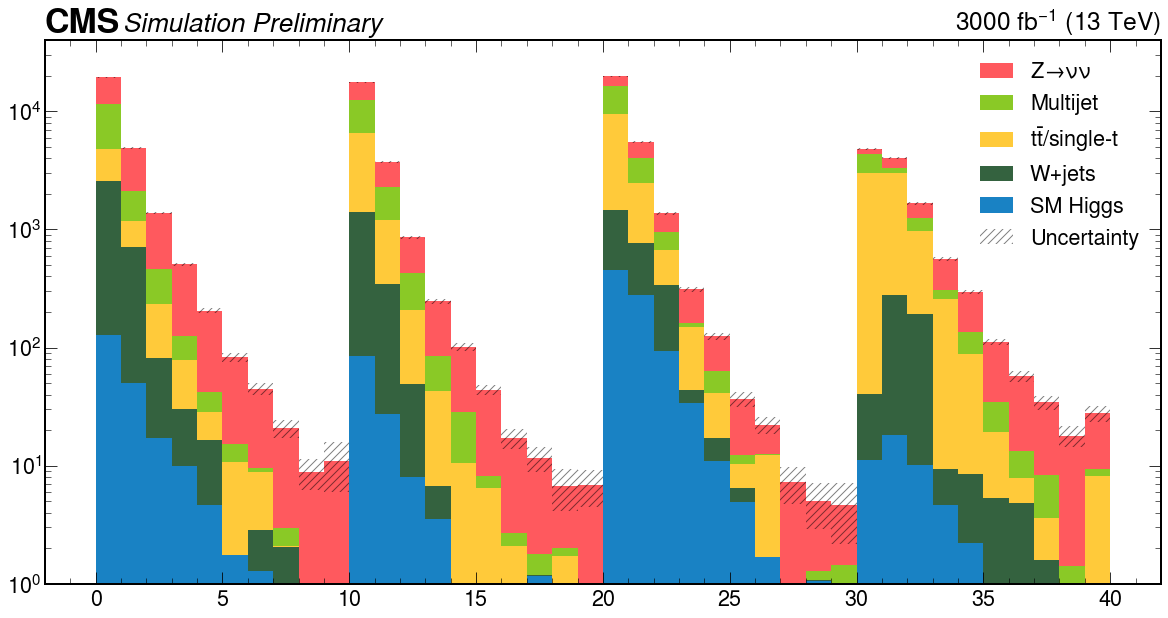

In [207]:
hists = get_hist(
    res["shapes_fit_b"],
    bins,
    ['tt', 'Zjets', 'Wjets', 'other', 'QCD', 'total'],
)

hist_list = [
    hists[0]['other'],
    hists[0]['Wjets'],
    hists[0]['tt'],
    hists[0]['QCD'],
    hists[0]['Zjets'],
]

labels = [
    'SM Higgs',
    'W+jets',
    r'$t\bar{t}$/single-t',
    'Multijet',
    r'Z$\to\nu\nu$'
]

f, ax = plt.subplots(figsize=(20,10))

hep.cms.label(
    "Preliminary",
    data=False,
    lumi=3000,
    #com=14,
    loc=0,
    ax=ax,
)

hep.histplot(
    hist_list,
    edges,
    histtype="fill",
    stack=True,
    label=labels,
    color=['#1982c4', '#34623f',  '#ffca3a', '#8ac926', '#ff595e' ],
    ax=ax)

add_uncertainty(hists[0]['total'], hists[1]['total'], edges, ax)

ax.legend()
ax.set_ylim(1,4e4)
ax.set_yscale('log')

plt.show()

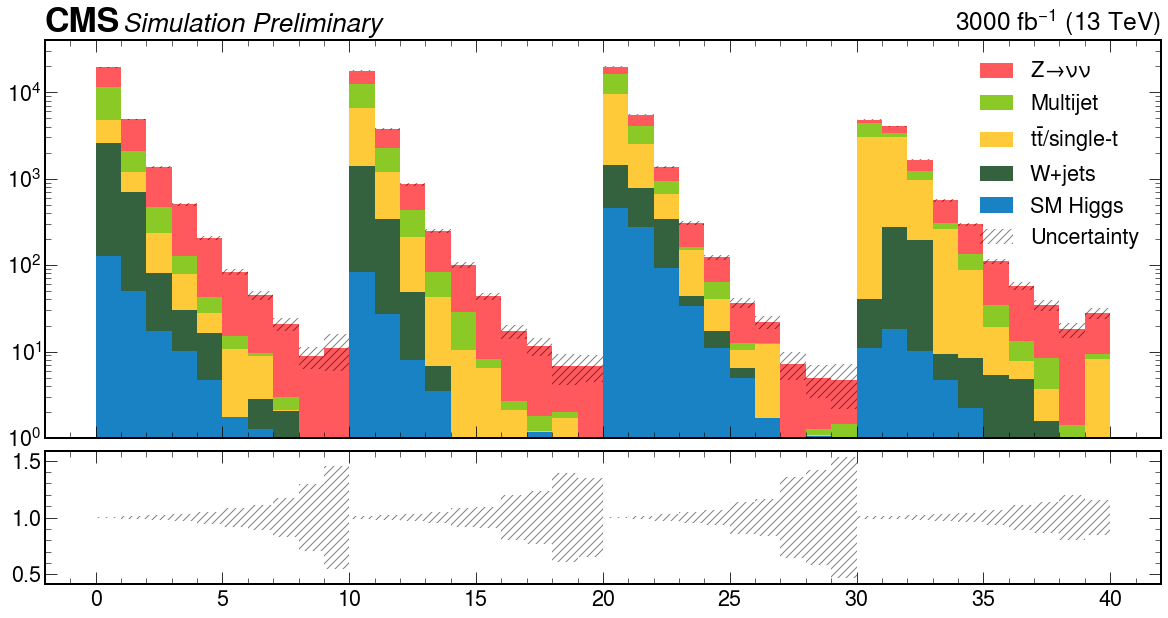

In [209]:
hists = get_hist(
    res["shapes_fit_b"],
    bins,
    ['tt', 'Zjets', 'Wjets', 'other', 'QCD', 'total'],
)

hist_list = [
    hists[0]['other'],
    hists[0]['Wjets'],
    hists[0]['tt'],
    hists[0]['QCD'],
    hists[0]['Zjets'],
]

labels = [
    'SM Higgs',
    'W+jets',
    r'$t\bar{t}$/single-t',
    'Multijet',
    r'Z$\to\nu\nu$'
]

#f, ax = plt.subplots(figsize=(20,10))
fig, (ax, rax) = plt.subplots(2,1,figsize=(20,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)


hep.cms.label(
    "Preliminary",
    data=False,
    lumi=3000,
    #com=14,
    loc=0,
    ax=ax,
)

hep.histplot(
    hist_list,
    edges,
    histtype="fill",
    stack=True,
    label=labels,
    color=['#1982c4', '#34623f',  '#ffca3a', '#8ac926', '#ff595e' ],
    ax=ax)

add_uncertainty(hists[0]['total'], hists[1]['total'], edges, ax)
add_uncertainty(hists[0]['total'], hists[1]['total'], edges, rax, ratio=True)


ax.legend()
ax.set_ylim(1,4e4)
ax.set_yscale('log')

plt.show()


In [213]:
np.sqrt(10)/10

0.31622776601683794